# 6.2 가중치의 초깃값  

초깃값을 어떻게 설정하는지가 신경망 학습의 성패를 가를수 있음  

## 6.2.1 초깃값을 0으로 하면?  

가중치 감소(weight decay): 오버피팅을 억제해 범용 성능을 높이는 테크닉  
가중치 감소는 말 그대로 가중치의 매개변수의 값이 작아지도록 학습하는 방법  

지금까지는 가중치의 초기값을 0.01 * np.random.randn(10,100)처럼 정규 뷴포에서 생성되는 값을 0.01배한 작은 값을 사용했다.  
가중치의 초깃값을 0으로 해서는 안되는 이유: 오차 역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 -> 따라서 초깃값을 무작위로 설정해야 한다.  

## 6.2.2 은닉층의 활성화 분포  

가중치의 초깃값에 따라 은닉층의 활성화 값들이 어떻게 변화하는지 실험  

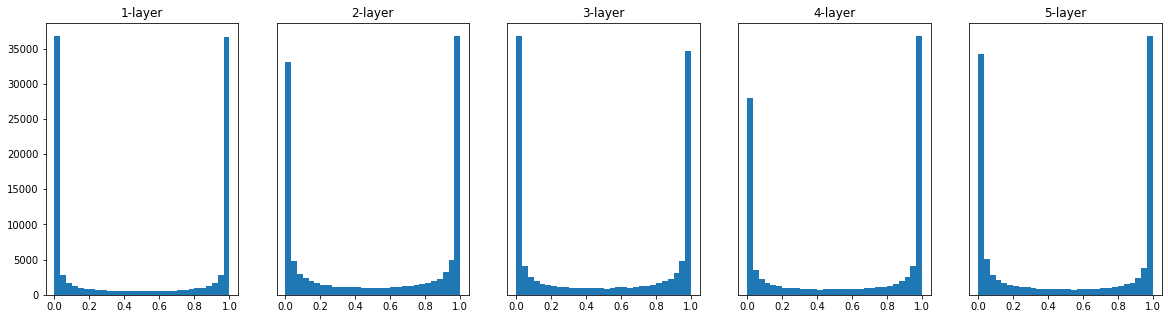

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

5개의 층이 있고 각 층에는 뉴런이 100개씩 있다.  
입력 데이터를 정규분포로 무작위 생성하여 신경망에 흘린다.  
활성화 값들이 0과 1에 치우쳐 있다.  
여기서 시그모이드 함수는 출력이 0 혹은 1에 가까워지면 미분이 0에 다가간다.  
따라서 데이터가 0과 1에 치우쳐 분ㅍ초하게 되고 역전파의 기울기 값이 점점 작아지다가 사라진다.  
이것을 기울기 소실(gradient vanishing)이라고 한다.  
층이 깊은 딥러닝에서는 더 심각한 문제가 될 수 있다.  

이번에는 가중치의 표준편차가 0.01으로 바꿔 실험을 반복한다.  

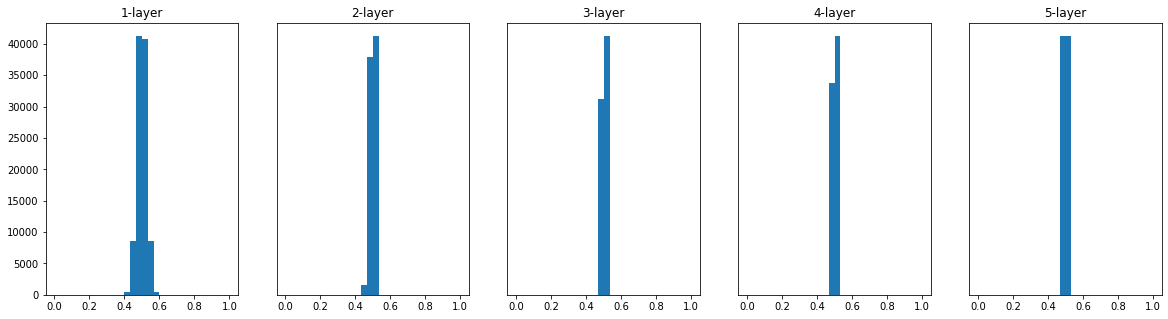

In [7]:
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

활성화 값의 분포가 0.5 부근에 집중되었다.  
이는 기울기 소실 문제는 일어나지 않았지만 표현력관점에서 큰 문제가 있다.  
다수의 뉴런이 같은 값을 가지므로 뉴런을 여러개 둔 의미가 없어진다.  
**따라서 활성화 값이 치우치게 되면 표현력을 제한한다는 관점에서 문제가 생긴다.**  

이번에는 Xavier Glorot와 Toshua Bengio의 논문에서 권장하는 가중치 초깃값인 Xavier 초깃값을 써보겠다.  
Xavier 초깃값은 일반적인 딥러닝 프레임워크의 표준으로 쓰이는 중  
논문에서는 각 층의 활성화 값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다.  
결론: 앞 계층의 노드의 개수:n, 표준편차는 1/(n)**0.5

<img src = "./image/fig_6_12.png" width="40%">  

Savier 초깃값을 사용시 앞층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.  

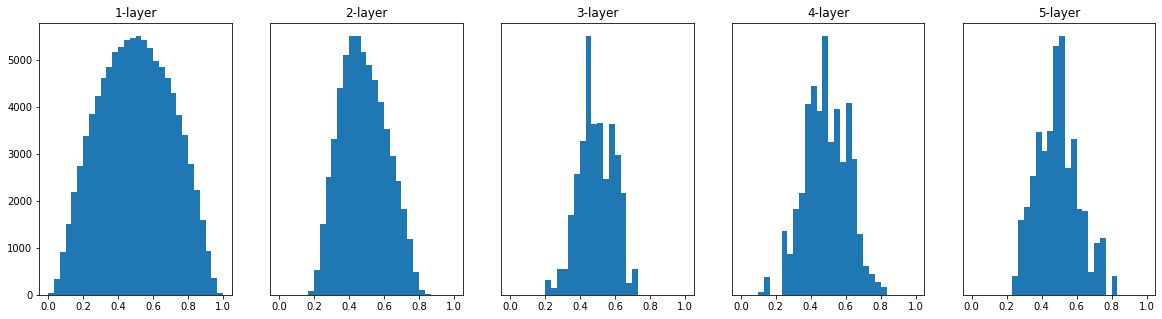

In [8]:
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

층이 깊어지면서 형태가 일그러지지만 앞의 방식보다 획실히 넓게 분포함을 알 수 있다.  

## 6.2.3 ReLU를 사용할 때의 가중치 초깃 값  

Xavier 초깃값은 활성화 함수가 선형인 것을 전재로 이끈 결과이다.  
sigmoid 함수나 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다.  
그래서 Xavier 초깃값이 적당하다.  
반면 ReLU의 경우 ReLU에 특화된 초기값을 사용하는 것이 좋다.  
특화된 초깃값은 이 초깃값을 찾아낸 Kaiming He의 이름을 따 **He 초깃값**이라 부른다.  
He 초깃값은 앞 계층의 노드가 n을 때 (2/n)**0.5인 정규분포를 사용한다.  
ReLU는 음의 영역이 0이라 더 넓게 분포시키기 위해서 2배의 계수가 필요하다 해석이 가능함.  

활성화 함수가 ReLU일 때, 각 초기값에 대한 실험 결과는 다음과 같다.  

<img src = "./image/fig_6_14.png" width="40%">  

std=0.01일때 각 층의 활성화 값은 아주 작은 값들이다.  
신경망에 서 아주 작은 데이터가 흐른다는 것은 역전파때 가중치의 기울기 역시 작아진다는 뜻이며,  
실제로도 학습이 거의 이뤄지지 않을 것이다.  

Xavier 초깃값은 층이 깊어지면서 조금씩 치우침이 커진다.  
실제로 층이 깊어지면 활성화 값들의 치우침도 커져 기울기 소실 문제를 일으킨다.  

마지막 He 초기값은 모든 층에 균일한게 분포되었다. 따라서 역전파시에도 적절한 값이 나온다고 기대할 수 있다.  

### 정리

|ReLU|sigmoid/tanh|
|---|---|
|He 초깃값|Xavier 초깃값|

## 6.2.4  MNIST 데이터 셋으로 본 가중치 초깃값 비교  

실제 데이터를보며 가중치 초깃값 비교  

3경우를 사용했을 때 손실함수의 변화를 측정해 봤다.  

<img src = "./image/fig_6_15.png" width = "40%">  

std = 0.01일 때는 학습이 전혀 이루어지지 않았고 He, Xavier는 학습이 원활이 이루어짐  
단 He 초깃값 쪽이 학습 진도가 더빠르다.  